In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from utils import load_env_file, set_mpl_configs
from utils import leave_percentile, distribution_analysis

load_env_file()
set_mpl_configs()

DATA_DIR = os.getenv('DATA_DIR')
print('DATA_DIR: {}'.format(DATA_DIR))

load env file
  root dir:
    /Users/k/Repo/gp-ibd
  current system:
    Darwin
  load .env.darwin
  loaded data dir:
    /Users/k/Nutstore Files/毕设-EHR/DB
done.
set matplotlib configs
  font family:
    ['Times New Roman']
done.
DATA_DIR: /Users/k/Nutstore Files/毕设-EHR/DB


# Comlications_Patients.csv

## Load Comlications_Patients.csv

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, 'complication', 'Complications_Patients.csv'))
df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,subject_id.1,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10098672,21229395,1,9975,9,10098672,M,61,2140,2011 - 2013,NaN
1,10098672,21229395,2,5990,9,10098672,M,61,2140,2011 - 2013,NaN
2,10098672,21229395,3,5849,9,10098672,M,61,2140,2011 - 2013,NaN
3,10098672,21229395,4,5559,9,10098672,M,61,2140,2011 - 2013,NaN
4,10098672,21229395,5,5793,9,10098672,M,61,2140,2011 - 2013,NaN


## EDA
### Number of ICD Code

In [3]:
stats = df.groupby('subject_id').agg({
    'icd_code': ['nunique'],
})
print('Description')
print('  unique subject_id: {}'.format(len(stats)))
stats.head(5)

Description
  unique subject_id: 2417


,icd_code
,nunique
subject_id,
10001186,14
10007174,51
10018852,5
10024331,102
10025647,43


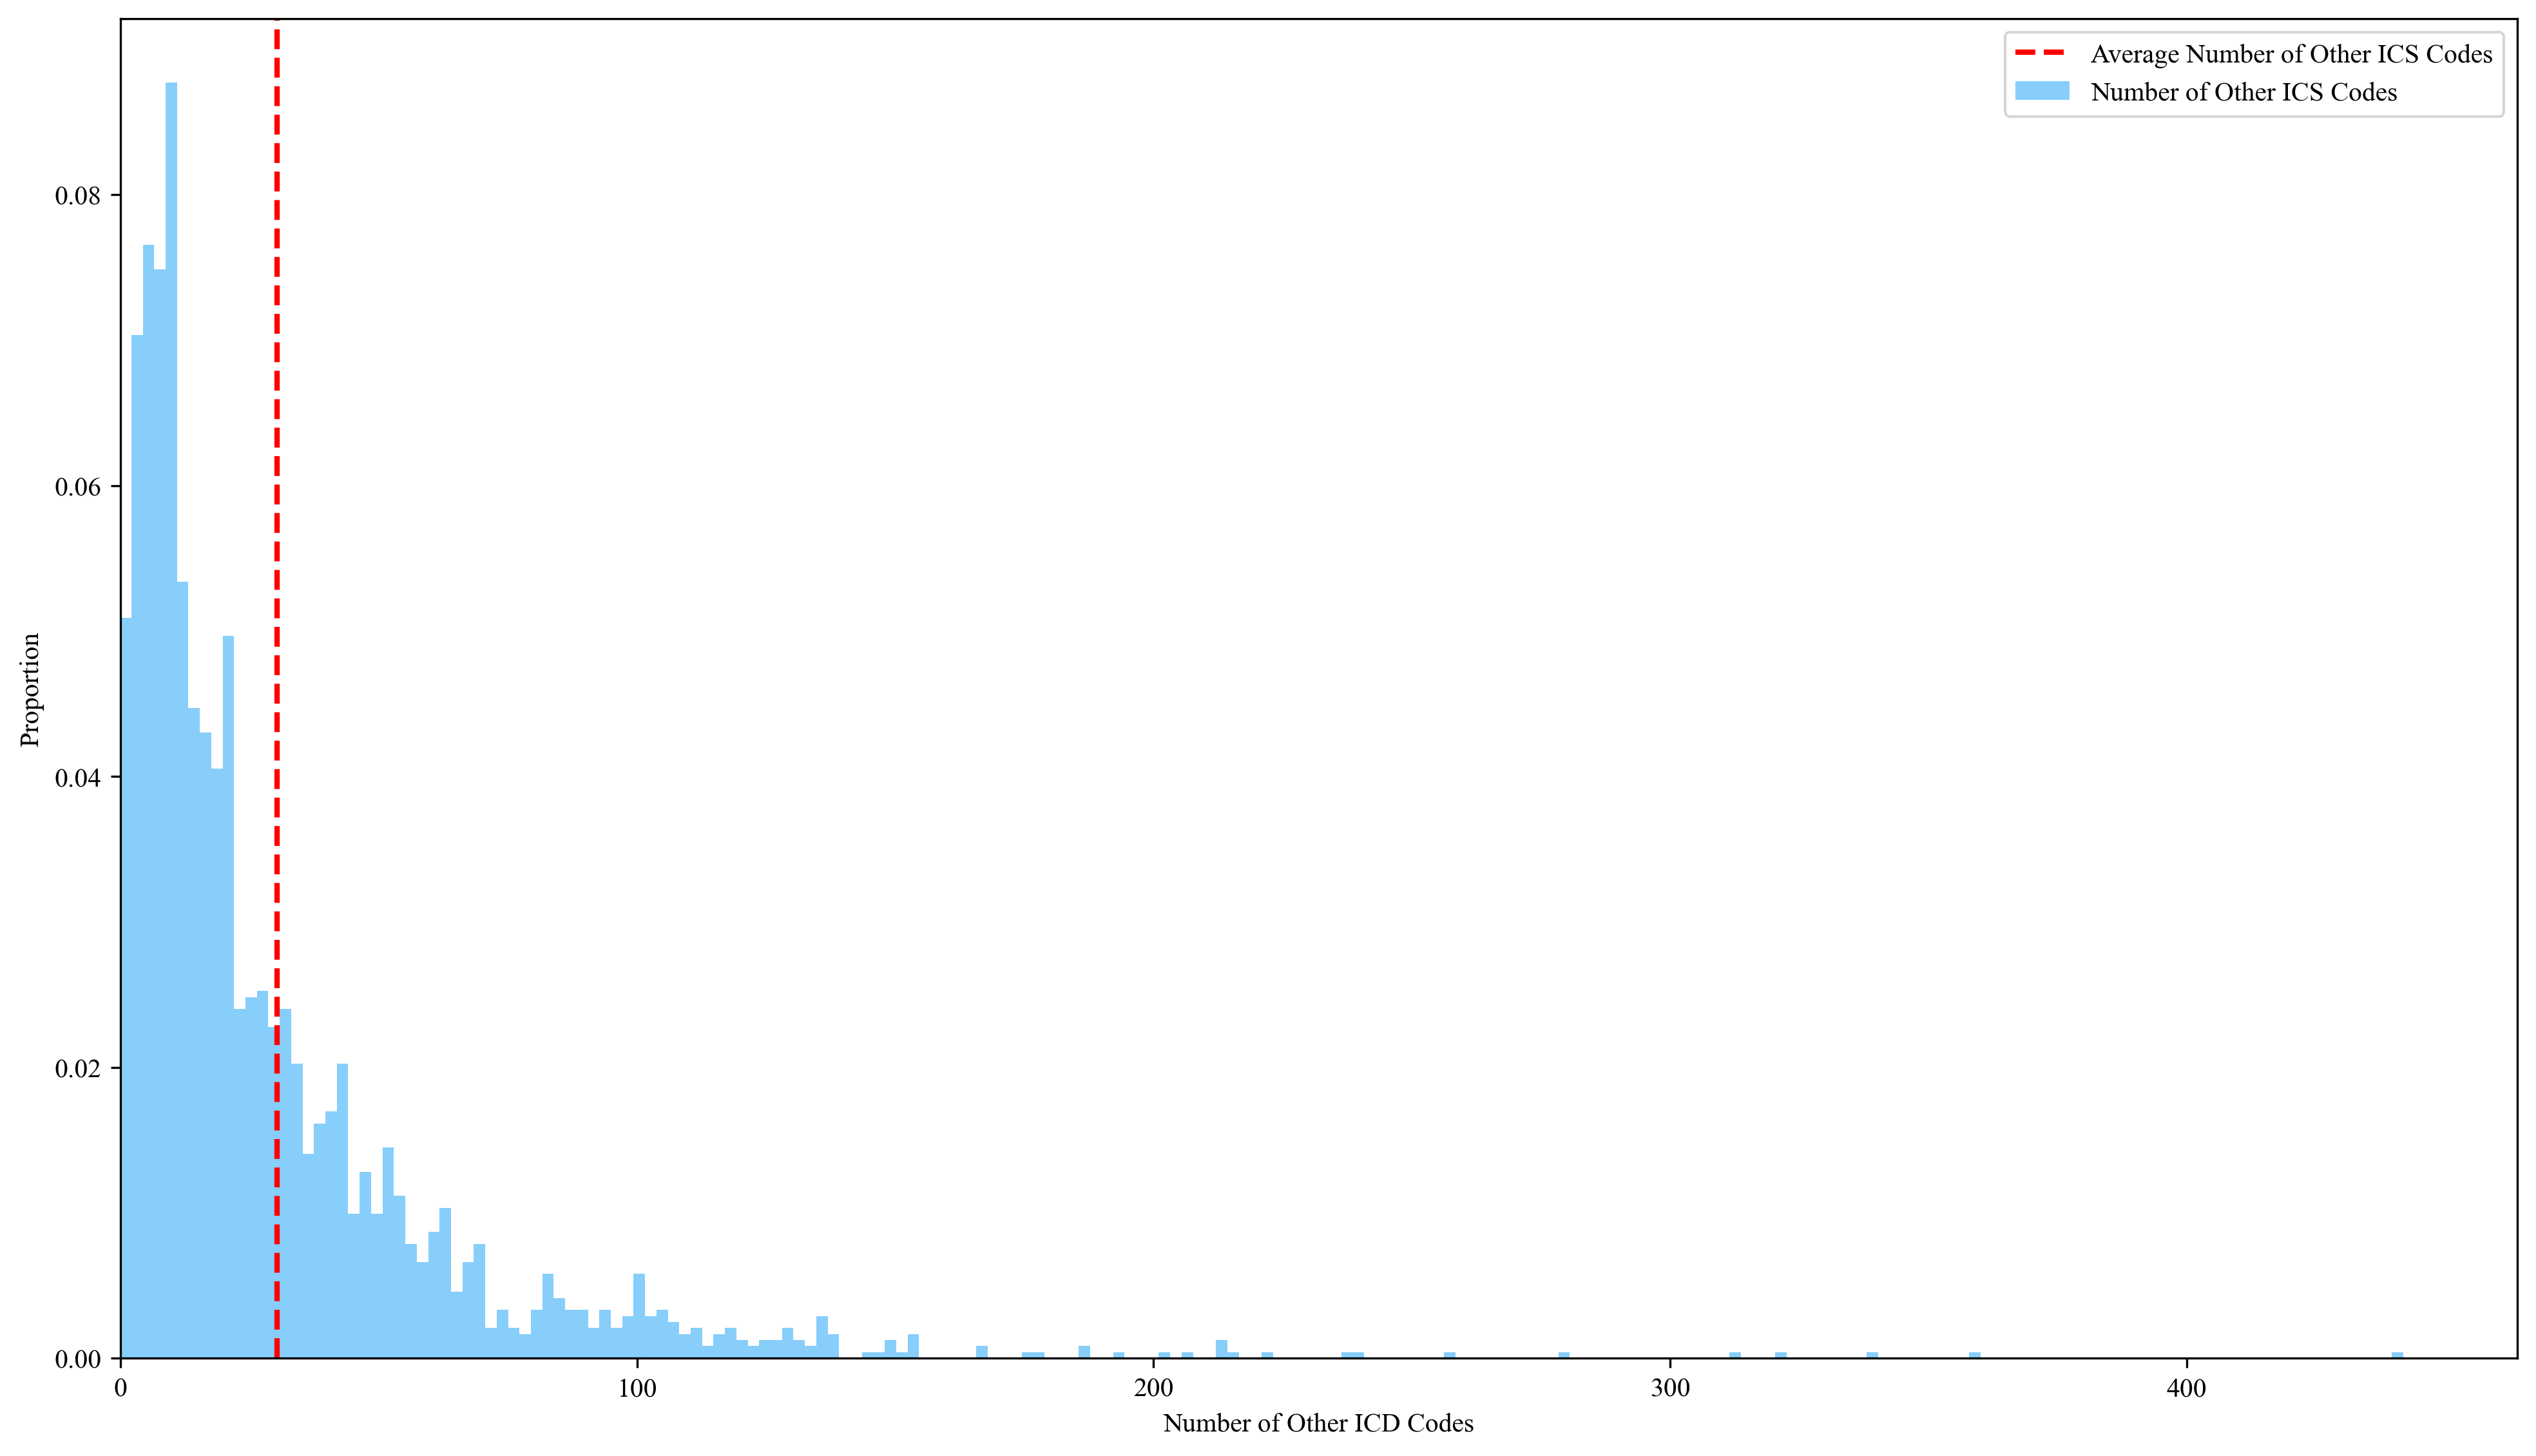

In [4]:
data = np.array(stats['icd_code']['nunique'])

hist, bins = distribution_analysis(
    _data = data, 
    do=False, 
    label='Number of Other ICS Codes', 
    vlinelabel='Average Number of Other ICS Codes', 
    xlabel='Number of Other ICD Codes', 
    ylabel='Proportion'
)

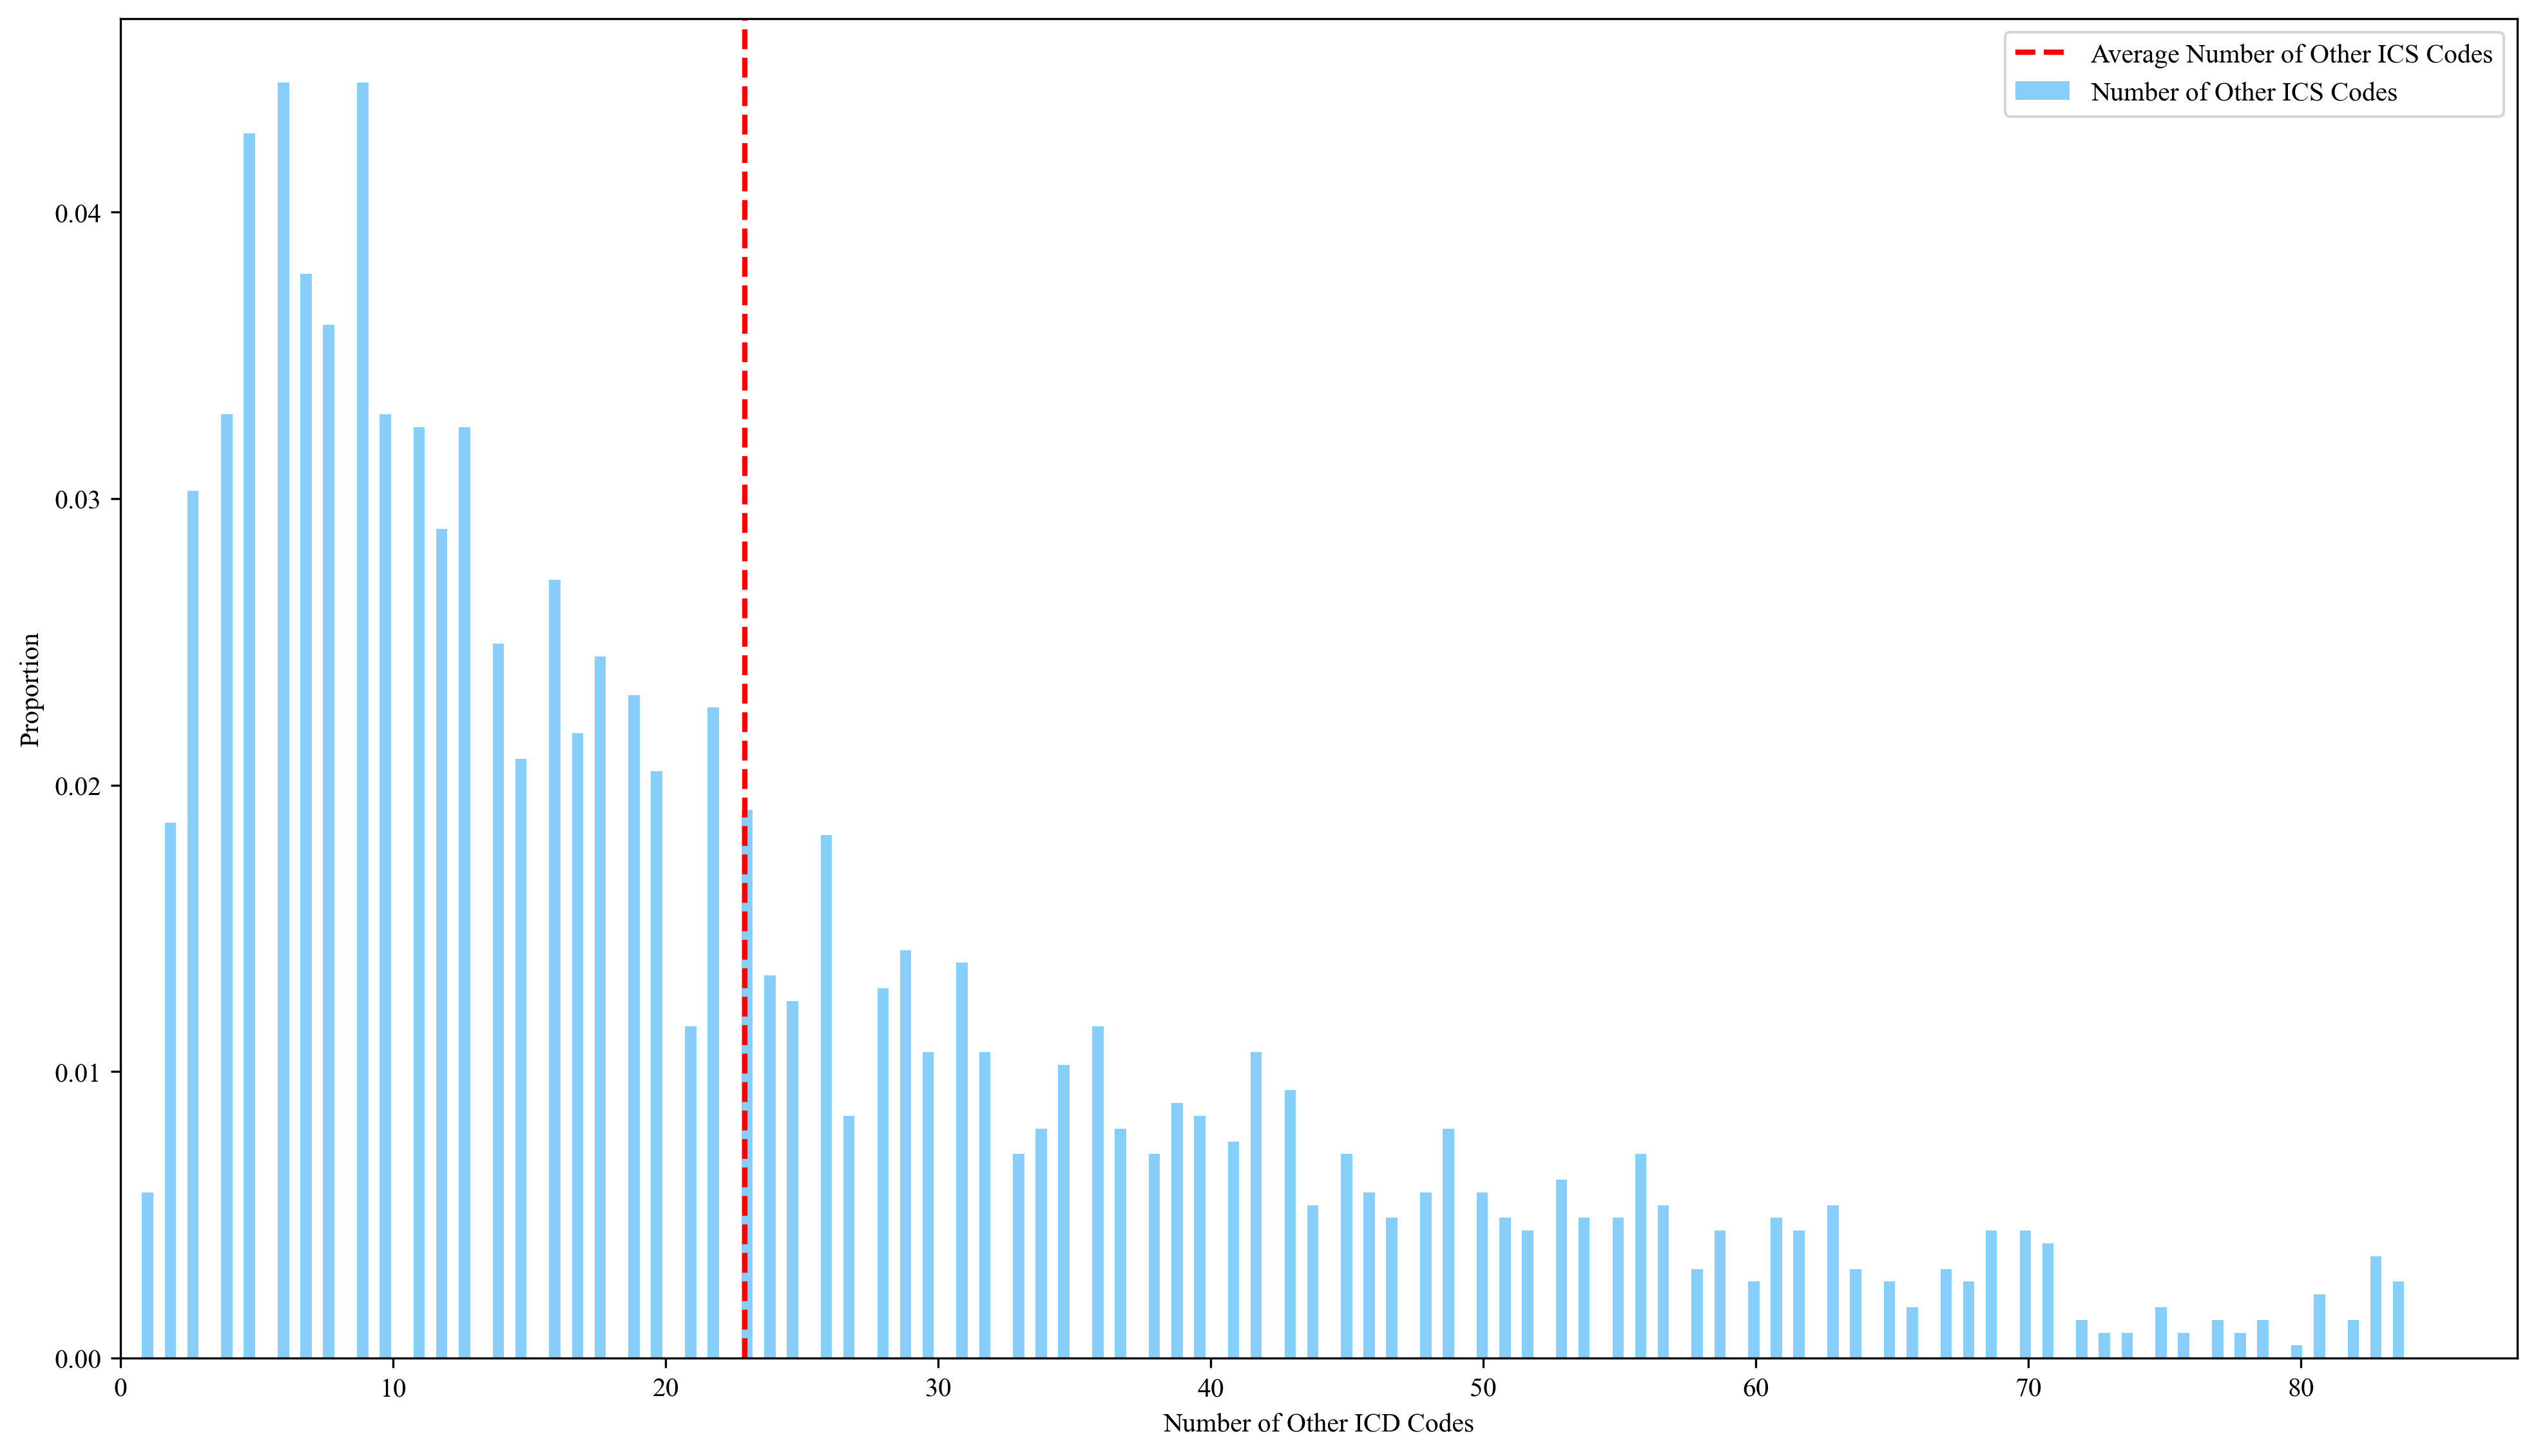

In [5]:
hist, bins = distribution_analysis(
    _data = data, 
    do=True, 
    label='Number of Other ICS Codes', 
    vlinelabel='Average Number of Other ICS Codes', 
    xlabel='Number of Other ICD Codes', 
    ylabel='Proportion'
)

### Number of UNIQUE Subject ID

In [6]:
df.head(2)

,subject_id,hadm_id,seq_num,icd_code,icd_version,subject_id.1,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10098672,21229395,1,9975,9,10098672,M,61,2140,2011 - 2013,NaN
1,10098672,21229395,2,5990,9,10098672,M,61,2140,2011 - 2013,NaN


In [7]:
stats = df.groupby(['subject_id', 'icd_code']).agg({
    'icd_code': ['count'],
})

stats.head(5)

icd_code
                       count
subject_id icd_code         
10001186   1123            1
           27800           1
           311             1
           34590           1
           5559            3

In [8]:
complications = stats.copy()

complications.columns = ['count']
complications = complications.reset_index()
# complications = complications.sort_values('count', ascending=False)

complications.head(10)

,subject_id,icd_code,count
0,10001186,1123,1
1,10001186,27800,1
2,10001186,311,1
3,10001186,34590,1
4,10001186,5559,3
5,10001186,6989,1
6,10001186,73399,1
7,10001186,73819,1
8,10001186,99832,2
9,10001186,E8782,1


In [9]:
stats = complications.groupby('icd_code').agg({
    'subject_id': ['nunique']
})

stats.head()

,subject_id
,nunique
icd_code,
0029,1
0030,4
0031,2
0038,1
0039,1


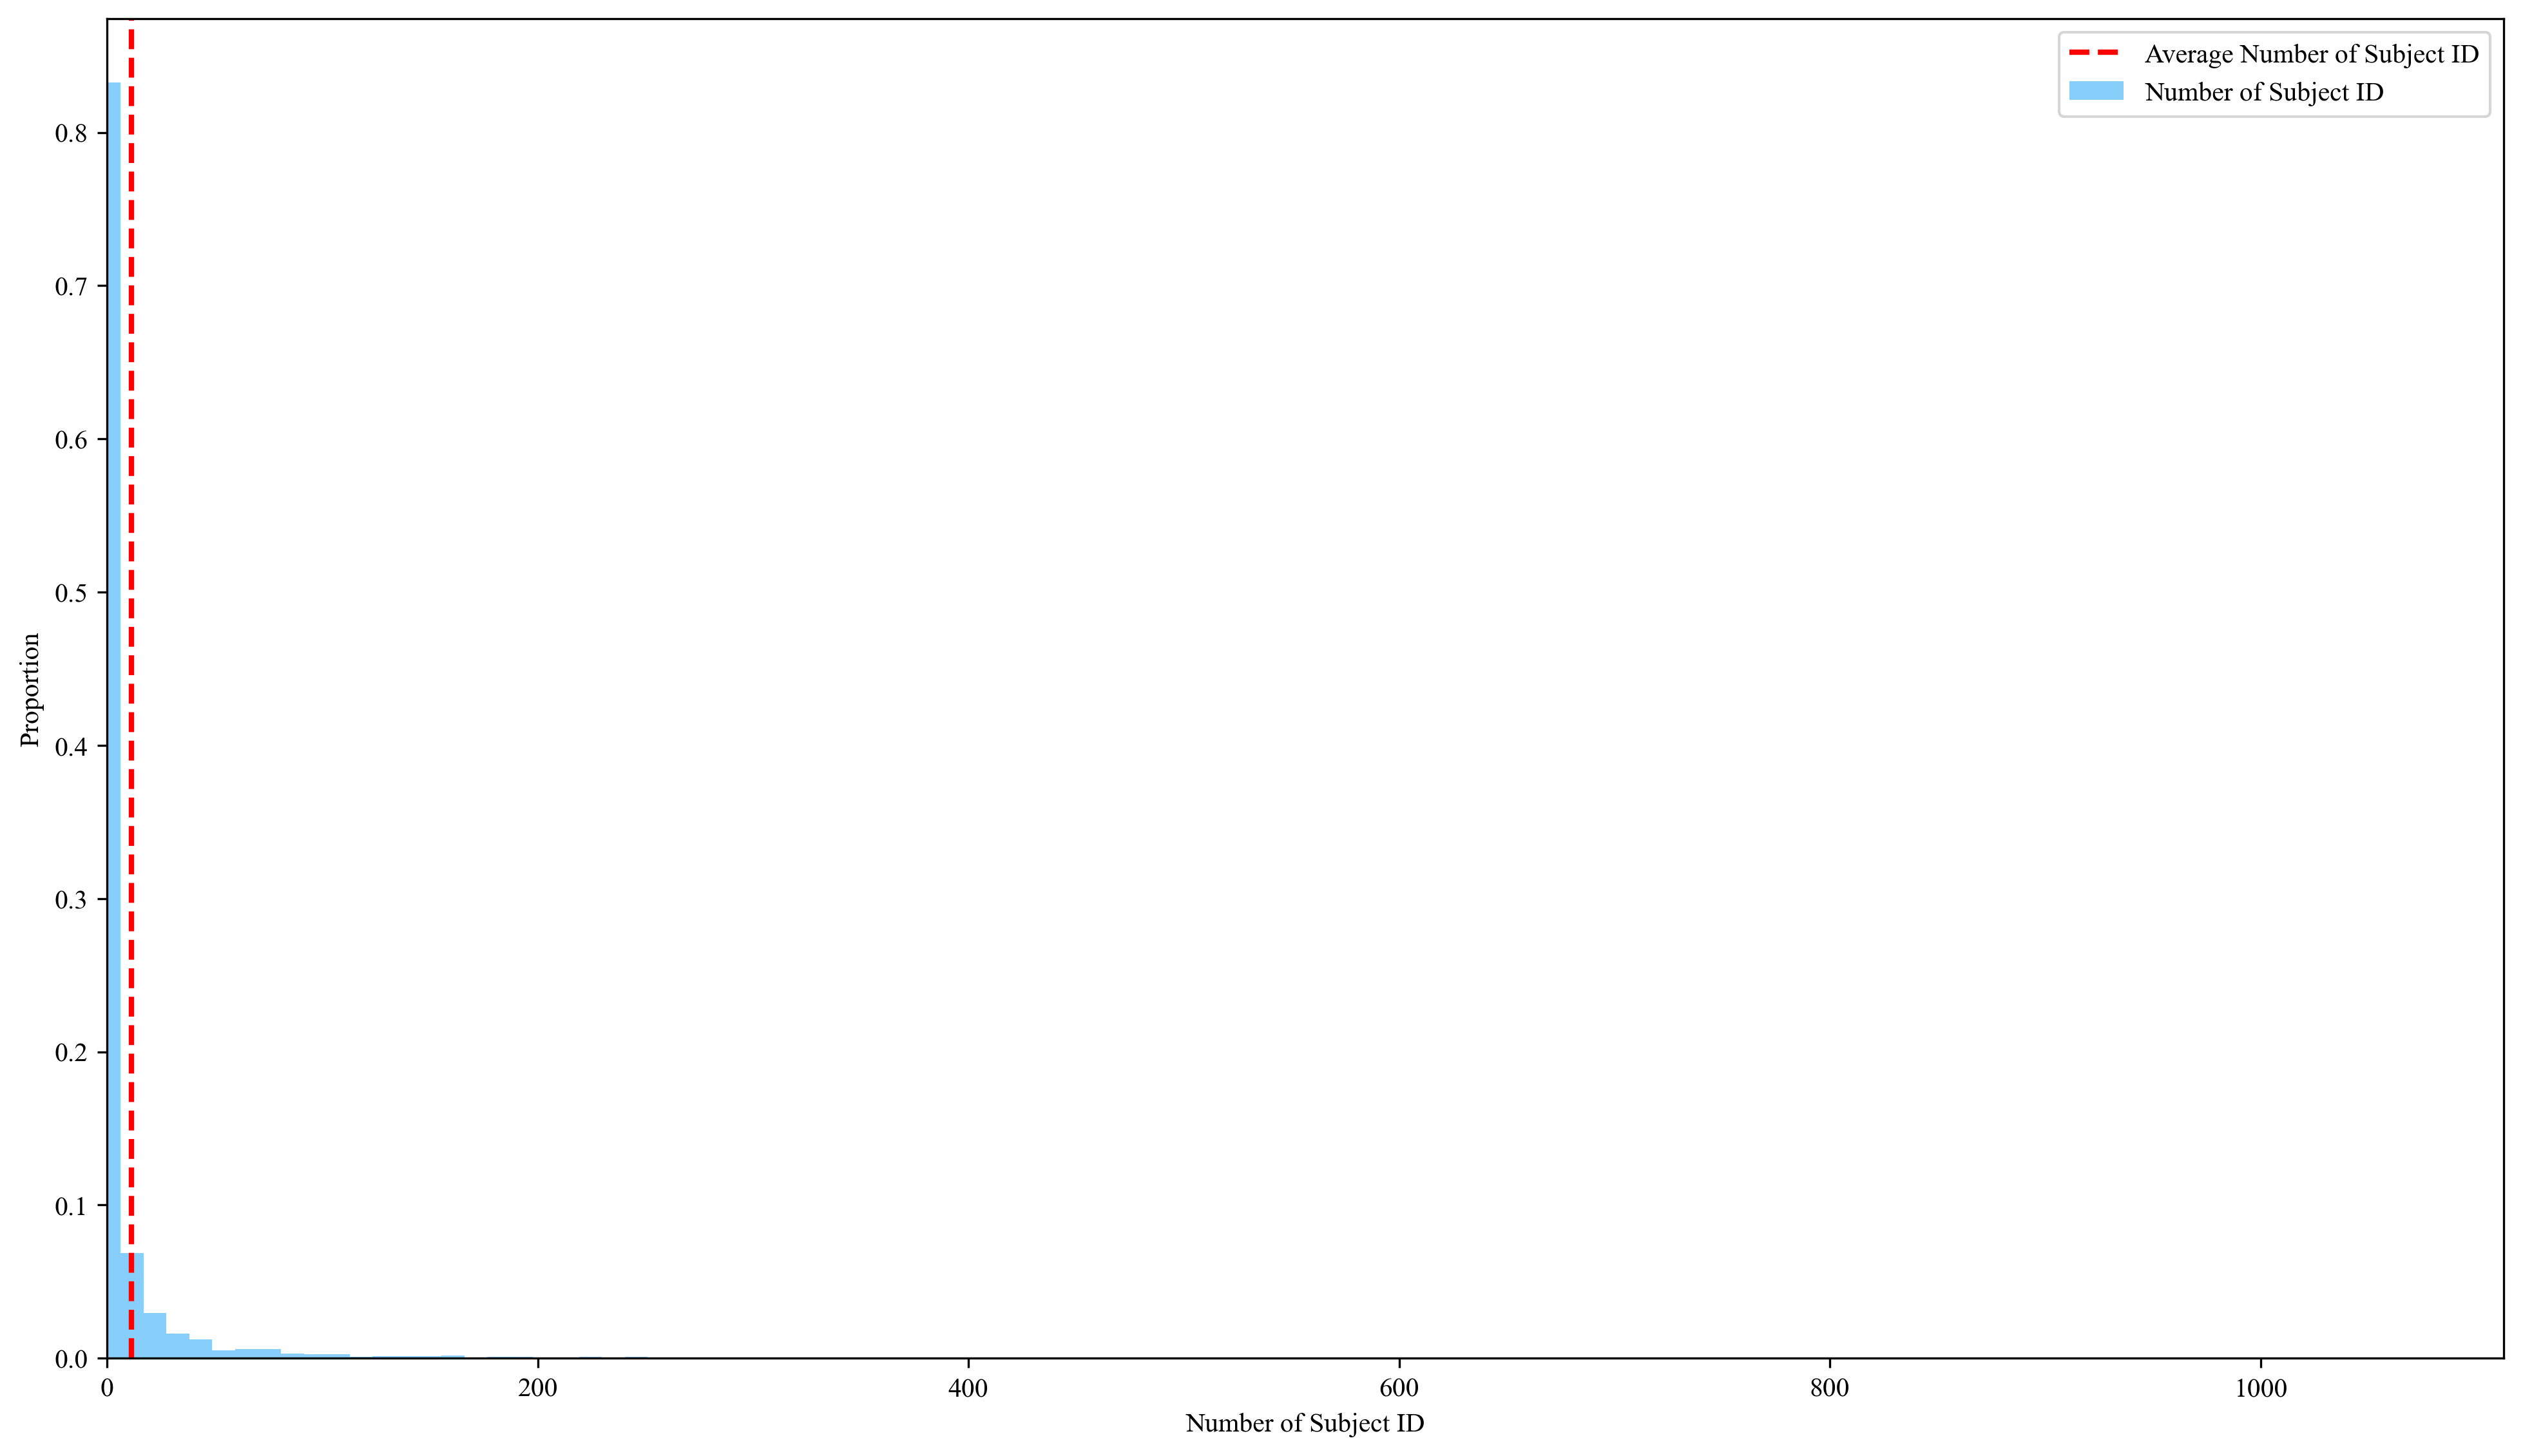

In [10]:
data = np.array(stats['subject_id']['nunique'])

hist, bins = distribution_analysis(
    _data = data, 
    _bins = 100,
    do=False, 
    label='Number of Subject ID', 
    vlinelabel='Average Number of Subject ID', 
    xlabel='Number of Subject ID', 
    ylabel='Proportion'
)

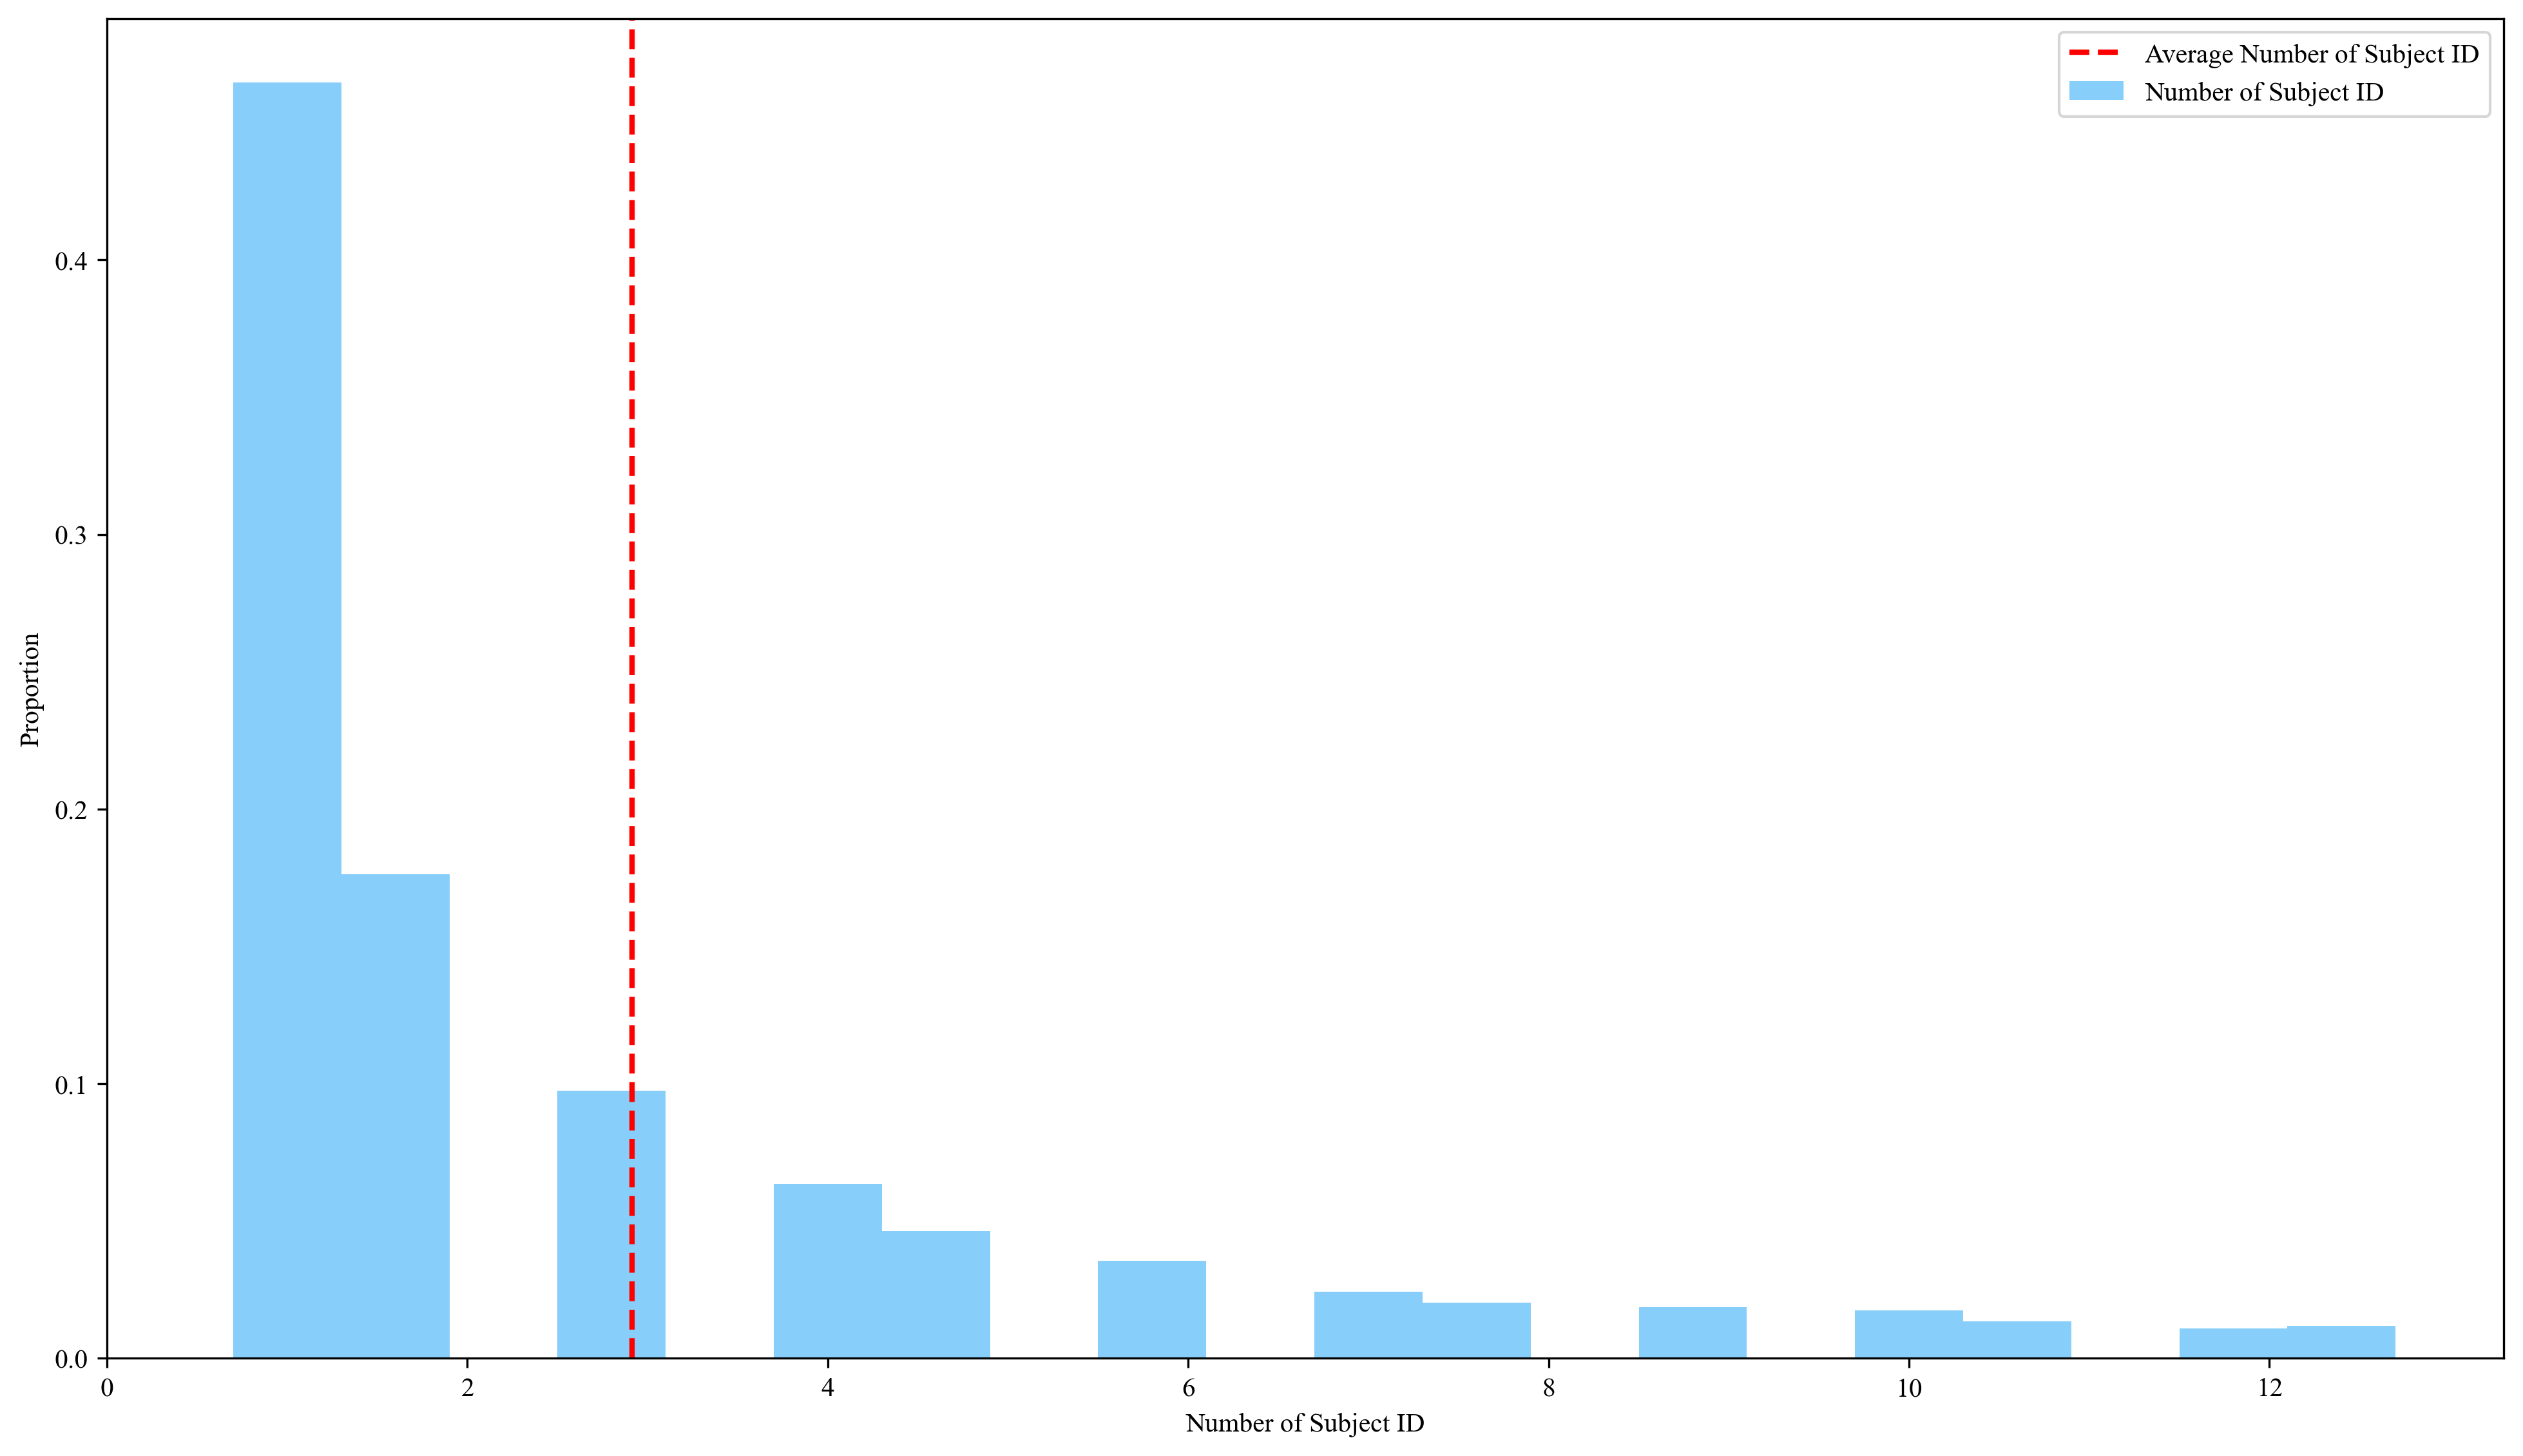

In [11]:
hist, bins = distribution_analysis(
    _data = data, 
    do=True, 
    _bins=20,
    label='Number of Subject ID', 
    vlinelabel='Average Number of Subject ID', 
    xlabel='Number of Subject ID', 
    ylabel='Proportion'
)

In [12]:
stats[stats['subject_id']['nunique'] > 400]

,subject_id
,nunique
icd_code,
2724,491
27651,409
2859,523
30000,439
311,502
4019,810
53081,678
5559,1065


### Number of 看病次数

In [13]:
stats = complications.groupby(['icd_code']).agg({
    'count': ['sum', 'mean', 'min', 'max'],
    'subject_id': 'count',
})

stats.head()

count              subject_id
           sum mean min max      count
icd_code                              
0029         1  1.0   1   1          1
0030         4  1.0   1   1          4
0031         2  1.0   1   1          2
0038         1  1.0   1   1          1
0039         1  1.0   1   1          1

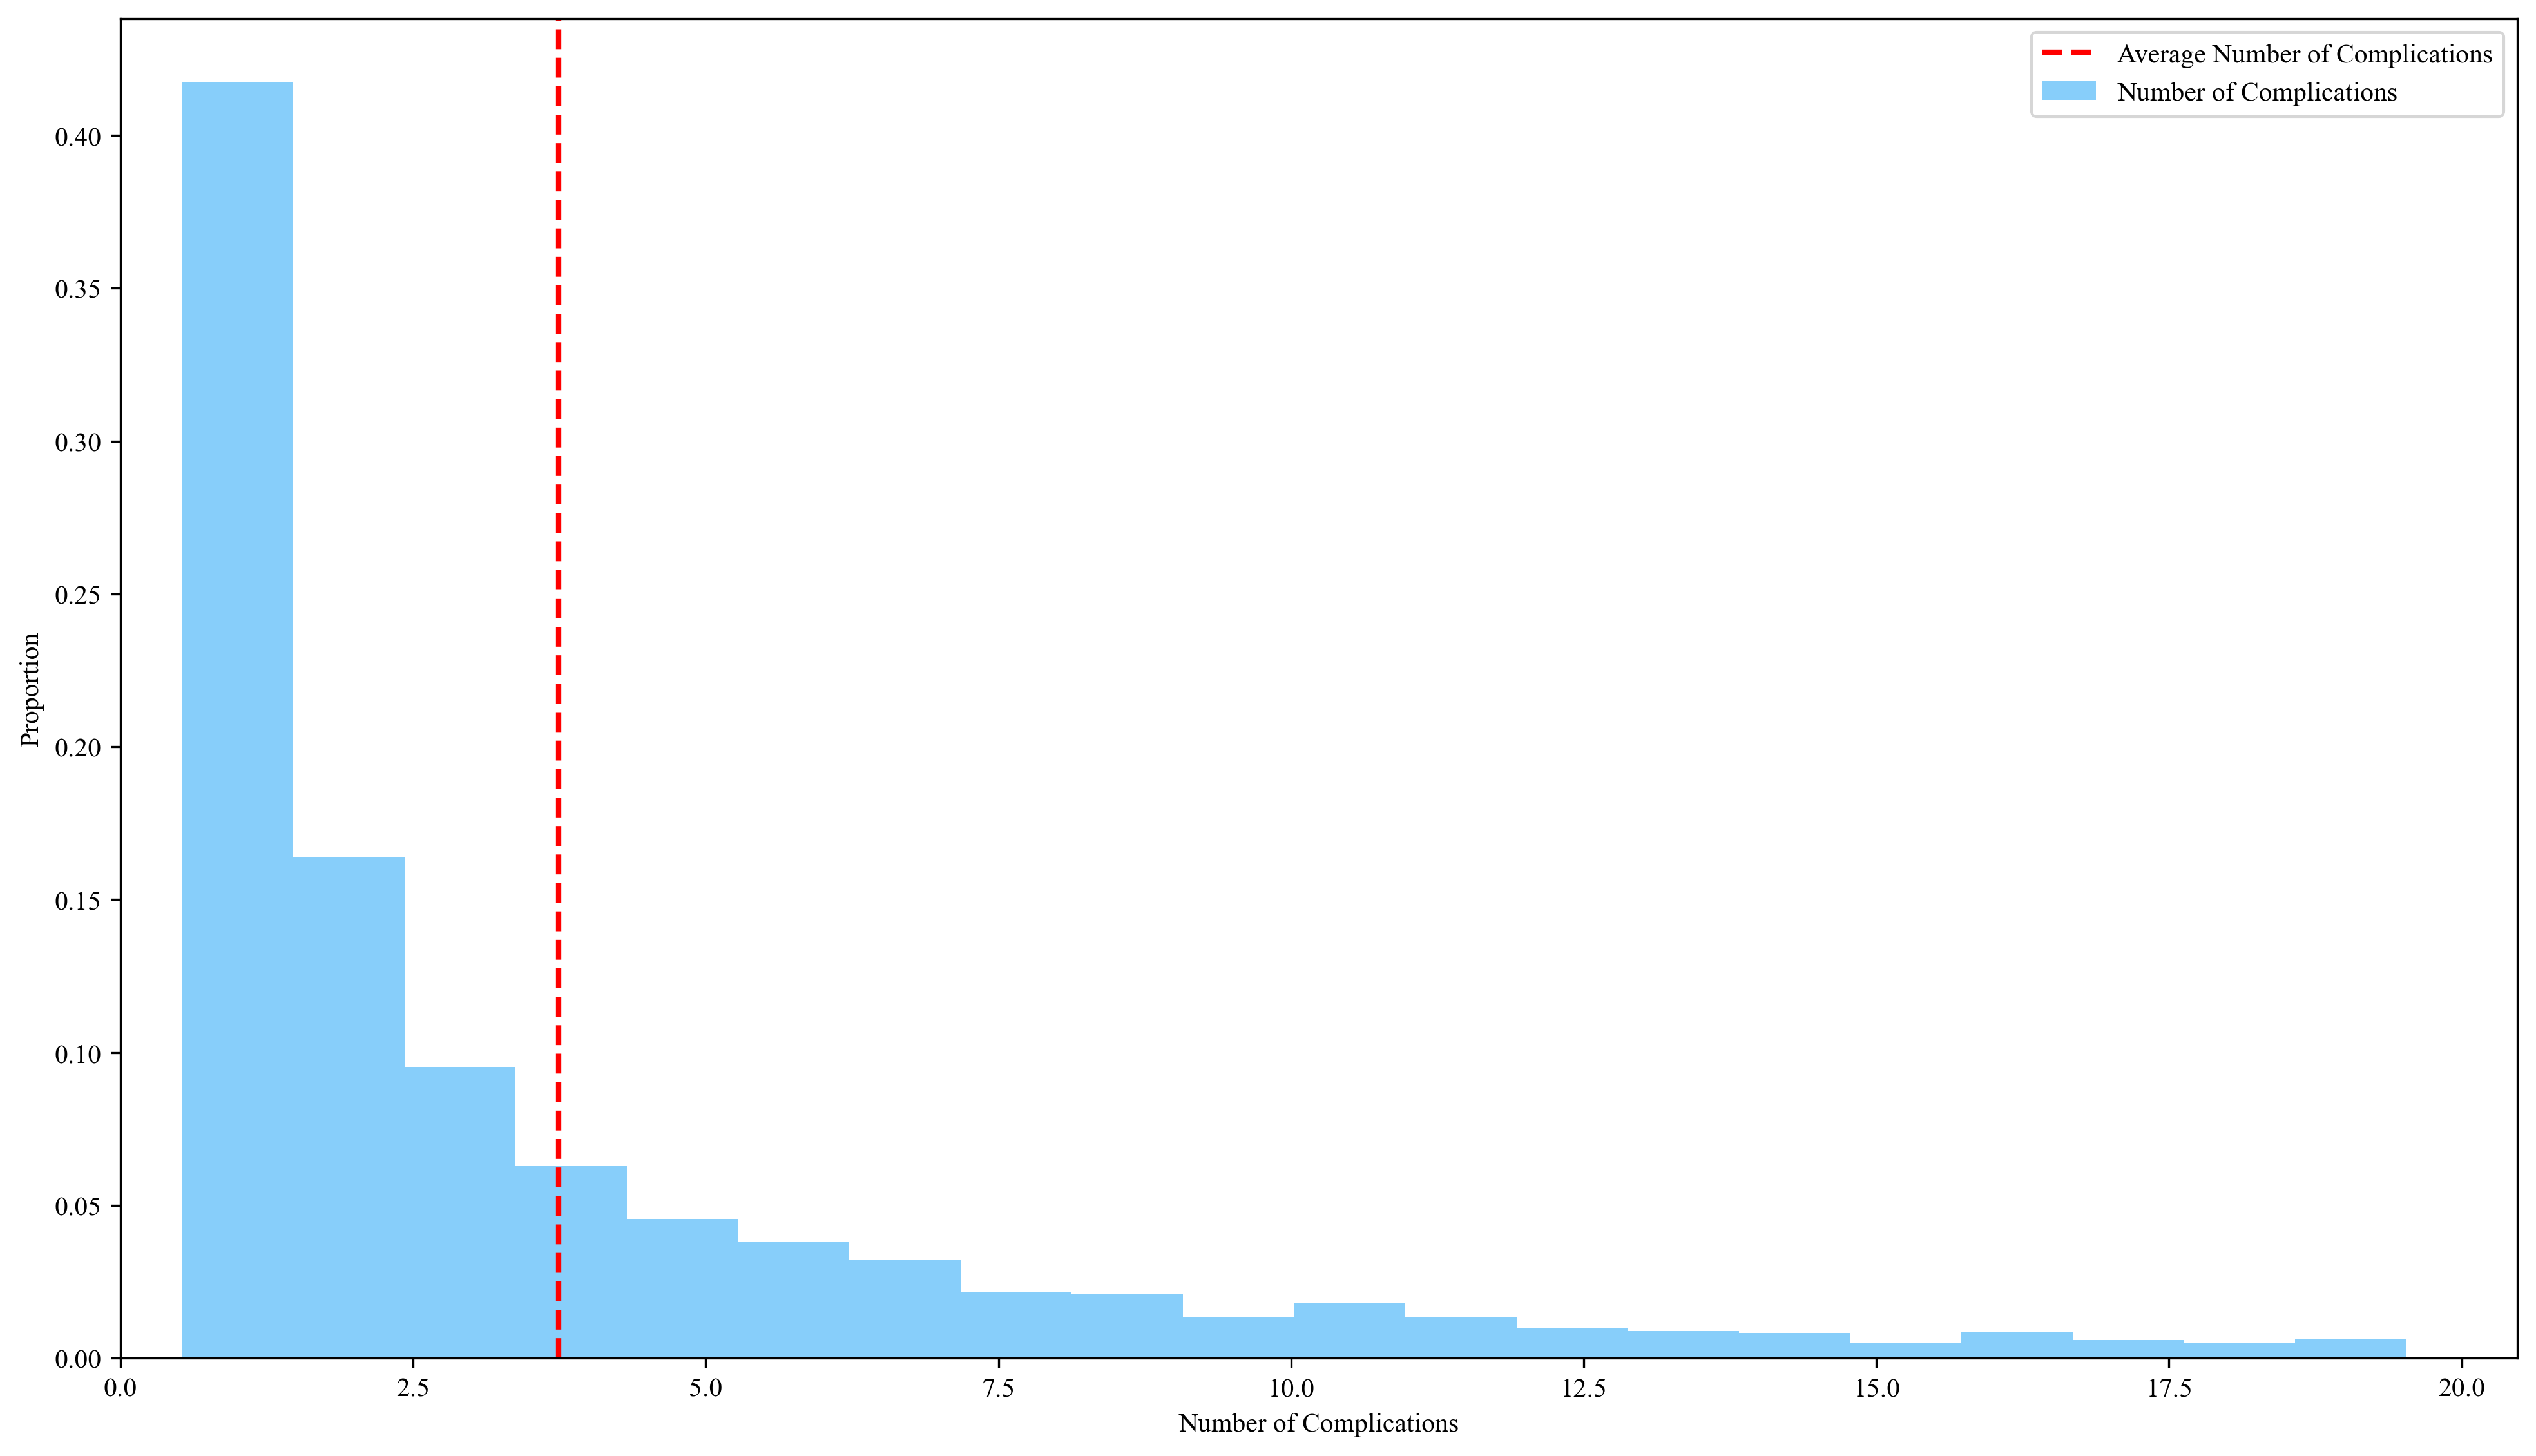

In [14]:
data = np.array(stats['count']['sum'])
# data.sort_values(ascending=False)

hist, bins = distribution_analysis(
    _data = data, 
    _bins = 20,
    do = True, 
    label = 'Number of Complications', 
    vlinelabel = 'Average Number of Complications', 
    xlabel = 'Number of Complications', 
    ylabel = 'Proportion'
)

In [15]:
stats[(stats['count']['sum'] > 500) & (stats['subject_id']['count'] > 400)]

count                   subject_id
           sum      mean min max      count
icd_code                                   
2724      1272  2.590631   1  44        491
27651      594  1.452323   1  13        409
2859       813  1.554493   1  18        523
30000      942  2.145786   1  17        439
311       1310  2.609562   1  33        502
4019      2247  2.774074   1  39        810
53081     1738  2.563422   1  46        678
5559      2174  2.041315   1  29       1065
5569      1681  1.947856   1  19        863
5849       900  2.008929   1  17        448
V1582     1053  2.093439   1  15        503

## Further Exploration

In [16]:
from utils_complications import who_get_this_disease, query_by_subject_id, batch_query_by_subject_id

In [17]:
df_2724 = batch_query_by_subject_id(df, who_get_this_disease(df, '2724'))
df_2724.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,subject_id.1,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10098672,21229395,1,9975,9,10098672,M,61,2140,2011 - 2013,NaN
1,10098672,21229395,2,5990,9,10098672,M,61,2140,2011 - 2013,NaN
2,10098672,21229395,3,5849,9,10098672,M,61,2140,2011 - 2013,NaN
3,10098672,21229395,4,5559,9,10098672,M,61,2140,2011 - 2013,NaN
4,10098672,21229395,5,5793,9,10098672,M,61,2140,2011 - 2013,NaN


In [18]:
stats = df_2724.groupby('subject_id').agg({
    'gender': 'first',
    'anchor_age': 'first',
    'anchor_year': 'first',
    'dod': 'first',
    'seq_num': ['count'],
    # 'icd_code': 'unique'
})

stats.head()

,gender,anchor_age,anchor_year,dod,seq_num
,first,first,first,first,count
subject_id,,,,,
10007174,M,70,2162,None,73
10024331,M,72,2140,2145-01-23,254
10025647,M,83,2175,2181-06-16,112
10027407,M,63,2188,None,7
10036640,M,61,2141,None,5


In [19]:
live = stats[stats['dod']['first'].isnull()]
dead = stats[stats['dod']['first'].notnull()]
print(live.shape[0], dead.shape[0])
live.head(), dead.head()

329 162


(           gender anchor_age anchor_year   dod seq_num
             first      first       first first   count
 subject_id                                            
 10007174        M         70        2162  None      73
 10027407        M         63        2188  None       7
 10036640        M         61        2141  None       5
 10070311        M         69        2151  None      28
 10098672        M         61        2140  None     112,
            gender anchor_age anchor_year         dod seq_num
             first      first       first       first   count
 subject_id                                                  
 10024331        M         72        2140  2145-01-23     254
 10025647        M         83        2175  2181-06-16     112
 10196368        M         71        2182  2189-11-07     183
 10251182        M         63        2152  2159-06-01     258
 10267634        F         43        2170  2172-01-25      45)

In [20]:
def description_of_suspect_icd_codes_mortality(_icd_code):
    df_2724 = batch_query_by_subject_id(df, who_get_this_disease(df, _icd_code))
    stats = df_2724.groupby('subject_id').agg({
        'gender': 'first',
        'anchor_age': 'first',
        'anchor_year': 'first',
        'dod': 'first',
        'seq_num': ['count'],
        # 'icd_code': 'unique'
    })

    live = stats[stats['dod']['first'].isnull()]
    dead = stats[stats['dod']['first'].notnull()]
    print('ICD Code: {}'.format(_icd_code))
    print('  live: {}'.format(live.shape[0]))
    print('  dead: {}'.format(dead.shape[0]))
    return (live, dead)


for _ in ['2724', '27651', '2859', '30000', '311', '4019', '53081', '5849', 'V1582']:
    live, dead = description_of_suspect_icd_codes_mortality(_)

ICD Code: 2724
  live: 329
  dead: 162
ICD Code: 27651
  live: 307
  dead: 102
ICD Code: 2859
  live: 377
  dead: 146
ICD Code: 30000
  live: 361
  dead: 78
ICD Code: 311
  live: 385
  dead: 117
ICD Code: 4019
  live: 591
  dead: 219
ICD Code: 53081
  live: 513
  dead: 165
ICD Code: 5849
  live: 265
  dead: 183
ICD Code: V1582
  live: 349
  dead: 154


In [21]:
def description_of_suspect_icd_codes_gender(_icd_code):
    df_2724 = batch_query_by_subject_id(df, who_get_this_disease(df, _icd_code))
    stats = df_2724.groupby('subject_id').agg({
        'gender': 'first',
        'anchor_age': 'first',
        'anchor_year': 'first',
        'dod': 'first',
        'seq_num': ['count'],
        # 'icd_code': 'unique'
    })

    male = stats[stats['gender']['first'] == 'M']
    female = stats[stats['gender']['first'] == 'F']
    print('ICD Code: {}'.format(_icd_code))
    print('  male: {}'.format(male.shape[0]))
    print('  female: {}'.format(female.shape[0]))
    return (male, female)


for _ in ['2724', '27651', '2859', '30000', '311', '4019', '53081', '5849', 'V1582']:
    male, female = description_of_suspect_icd_codes_gender(_)

ICD Code: 2724
  male: 251
  female: 240
ICD Code: 27651
  male: 162
  female: 247
ICD Code: 2859
  male: 220
  female: 303
ICD Code: 30000
  male: 163
  female: 276
ICD Code: 311
  male: 186
  female: 316
ICD Code: 4019
  male: 377
  female: 433
ICD Code: 53081
  male: 270
  female: 408
ICD Code: 5849
  male: 232
  female: 216
ICD Code: V1582
  male: 241
  female: 262
